# **Assignment 2. Are Deeper Networks Better?**

* 使用Fully Connected Neural Network
* 在相同超參數設定下(batch_size=20; epochs=15; optimizer=‘Adam’)，比較10個不同深度(1 hidden layer, 5 hidden layers, 9 hidden layers,…, 37 hidden layers)神經網路模型的分類準確度
* 評論與回答”Are deeper networks better?”



In [1]:
# Install old-version Tensorflow if necessary
!pip install tensorflow==2.7.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.7.0 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.7.0


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


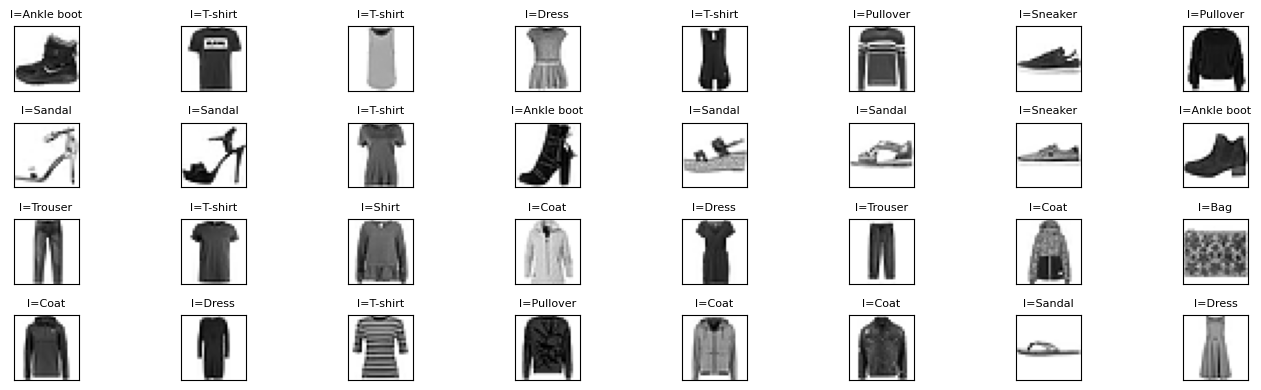

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from tensorflow.keras.datasets import fashion_mnist

#Load training data and testing from mnist
(x_train_image, y_train_label), (x_test_image, y_test_label) = fashion_mnist.load_data()
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

def plot_multiimages(images, labels, prediction, idx, num=32):
    plt.gcf().set_size_inches(14, 4)
    if num > 32: num = 32
    for i in range(0, num):
        ax=plt.subplot(4,8, 1+i)
        ax.imshow(images[idx],cmap='binary')
        title = "l=" + class_names[int(labels[idx])]
        if len(prediction) > 0:
            title = "l={},p={}".format(class_names[int(labels[idx])], class_names[prediction[idx]])
        else:
            title = "l={}".format(class_names[int(labels[idx])])
        ax.set_title(title, fontsize=8)
        ax.set_xticks([]); ax.set_yticks([])
        idx+=1
    plt.tight_layout()
    plt.show()
plot_multiimages(x_train_image, y_train_label, [], 0, 32)

#Reshape the image from 2D image to 1D image of size 28*28
x_train = x_train_image.reshape(len(x_train_image), 28*28).astype('float32')
x_test = x_test_image.reshape(len(x_test_image), 28*28).astype('float32')
x_train_norm = x_train/255
x_test_norm = x_test/255
y_TrainOneHot = utils.to_categorical(y_train_label)
y_TestOneHot = utils.to_categorical(y_test_label)

In [8]:
# Build a neural network here.....................
#TODO....

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# 製作模型
def build_fc_model(num_hidden_layers=1, units=256):
    model = Sequential()
    model.add(Dense(units, activation='relu', input_shape=(784,)))
    for _ in range(num_hidden_layers - 1):
        model.add(Dense(units, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

depth_list = [1, 5, 9, 13, 17, 21, 25, 29, 33, 37]
model_dict = {}

# 分別建立1,5,...,37層的模型
for depth in depth_list:
    print(f"Building model with {depth} hidden layers...")
    model_dict[depth] = build_fc_model(num_hidden_layers=depth)

accuracy_list = []

#分別選擇1, 5, 9, 13, 17, 21, 25, 29, 33, 3，再下一步
depth = 37
model = model_dict[depth]

Building model with 1 hidden layers...
Building model with 5 hidden layers...
Building model with 9 hidden layers...
Building model with 13 hidden layers...
Building model with 17 hidden layers...
Building model with 21 hidden layers...
Building model with 25 hidden layers...
Building model with 29 hidden layers...
Building model with 33 hidden layers...
Building model with 37 hidden layers...


Epoch 1/15
200/200 - 18s - 88ms/step - accuracy: 0.1040 - loss: 2.3032 - val_accuracy: 0.0990 - val_loss: 2.3024
Epoch 2/15
200/200 - 10s - 48ms/step - accuracy: 0.1065 - loss: 2.3026 - val_accuracy: 0.1160 - val_loss: 2.3018
Epoch 3/15
200/200 - 10s - 51ms/step - accuracy: 0.1100 - loss: 2.3025 - val_accuracy: 0.1160 - val_loss: 2.3018
Epoch 4/15
200/200 - 11s - 53ms/step - accuracy: 0.1100 - loss: 2.3023 - val_accuracy: 0.1160 - val_loss: 2.3018
Epoch 5/15
200/200 - 12s - 58ms/step - accuracy: 0.1100 - loss: 2.3022 - val_accuracy: 0.1160 - val_loss: 2.3018
Epoch 6/15
200/200 - 7s - 35ms/step - accuracy: 0.1100 - loss: 2.3022 - val_accuracy: 0.1160 - val_loss: 2.3018
Epoch 7/15
200/200 - 10s - 48ms/step - accuracy: 0.1100 - loss: 2.3021 - val_accuracy: 0.1160 - val_loss: 2.3018
Epoch 8/15
200/200 - 10s - 51ms/step - accuracy: 0.1100 - loss: 2.3021 - val_accuracy: 0.1160 - val_loss: 2.3018
Epoch 9/15
200/200 - 11s - 53ms/step - accuracy: 0.1100 - loss: 2.3020 - val_accuracy: 0.1160 - v

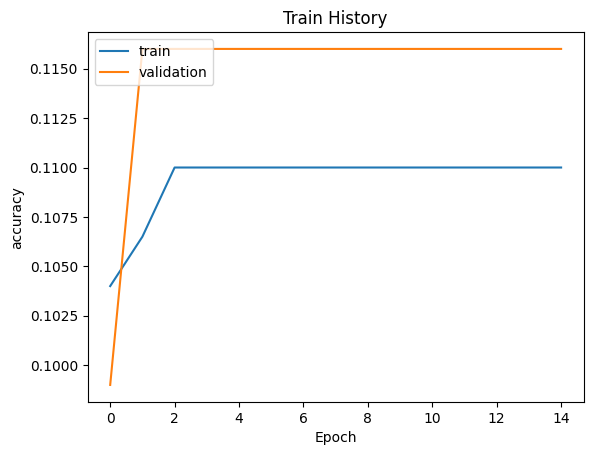

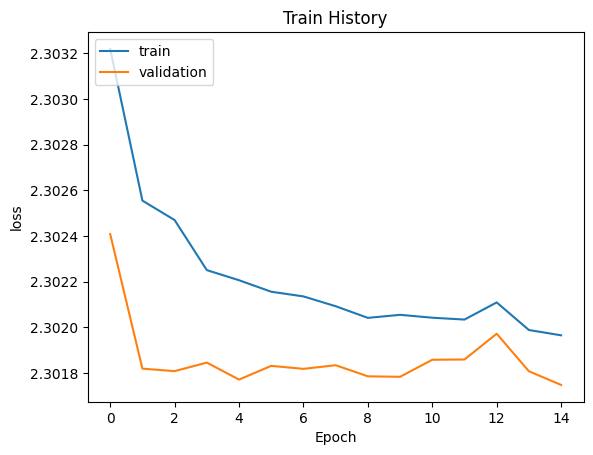

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.0998 - loss: 2.3033

	[Info] Accuracy of testing data = 10.0%
	[Info] Making prediction to x_test_norm
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step

	[Info] Show 10 prediction result (From 0):
[1 1 1 1 1 1 1 1 1 1]



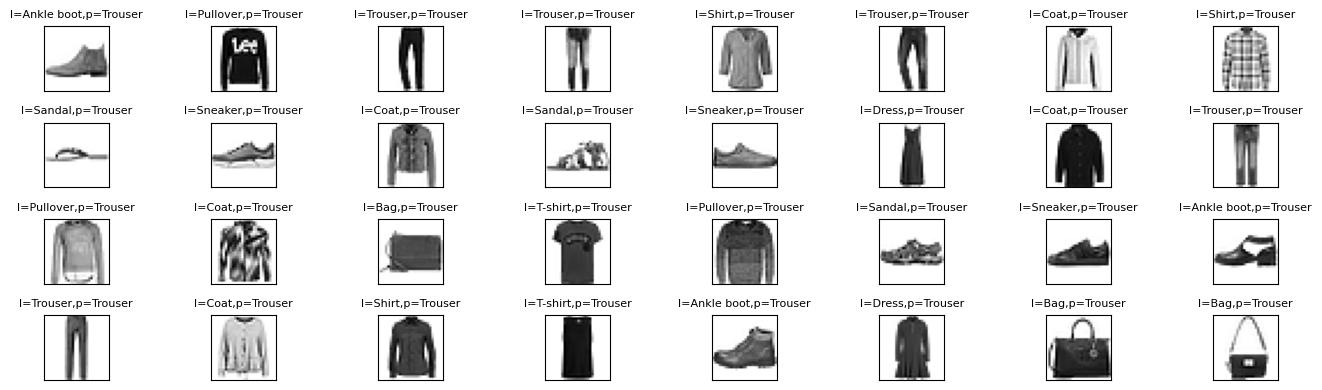

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
train_history = model.fit(x=x_train_norm[0:5000], y=y_TrainOneHot[0:5000], validation_split=0.2, epochs=15, batch_size=20, verbose=2)

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

scores = model.evaluate(x_test_norm, y_TestOneHot)
print()
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))
print("\t[Info] Making prediction to x_test_norm")


# Making prediction and save result to prediction
prediction_prob = model.predict(x_test_norm[0:1000])
prediction = np.argmax(prediction_prob,axis=1)

print()
print("\t[Info] Show 10 prediction result (From 0):")
print("%s\n" % (prediction[0:10]))

plot_multiimages(x_test_image, y_test_label, prediction, idx=0)